Libraries imported successfully.
🔬 Hückel Analysis Results for Triphenylene 🔬
--------------------------------------------------

Computed Molecular Orbital Energies (eV):
  MO 1 :   -7.002 eV (Occupied)
  MO 2 :   -5.000 eV (Occupied)
  MO 3 :   -5.000 eV (Occupied)
  MO 4 :   -4.681 eV (Occupied)
  MO 5 :   -3.307 eV (Occupied)
  MO 6 :   -2.968 eV (Occupied)
  MO 7 :   -2.500 eV (Occupied)
  MO 8 :   -1.314 eV (Occupied)
  MO 9 :   -1.155 eV (Occupied) (HOMO)
  MO 10:    1.155 eV (Virtual) (LUMO)
  MO 11:    1.314 eV (Virtual)
  MO 12:    2.500 eV (Virtual)
  MO 13:    2.968 eV (Virtual)
  MO 14:    3.307 eV (Virtual)
  MO 15:    4.681 eV (Virtual)
  MO 16:    5.000 eV (Virtual)
  MO 17:    5.000 eV (Virtual)
  MO 18:    7.002 eV (Virtual)

--------------------------------------------------
Energetic Properties Summary:
  Total π-Electron Energy:    -65.855 eV
  Delocalization Energy:      -20.855 eV (relative to 9 ethylene units)
  HOMO Energy:                 -1.155 eV
  LUMO Ener

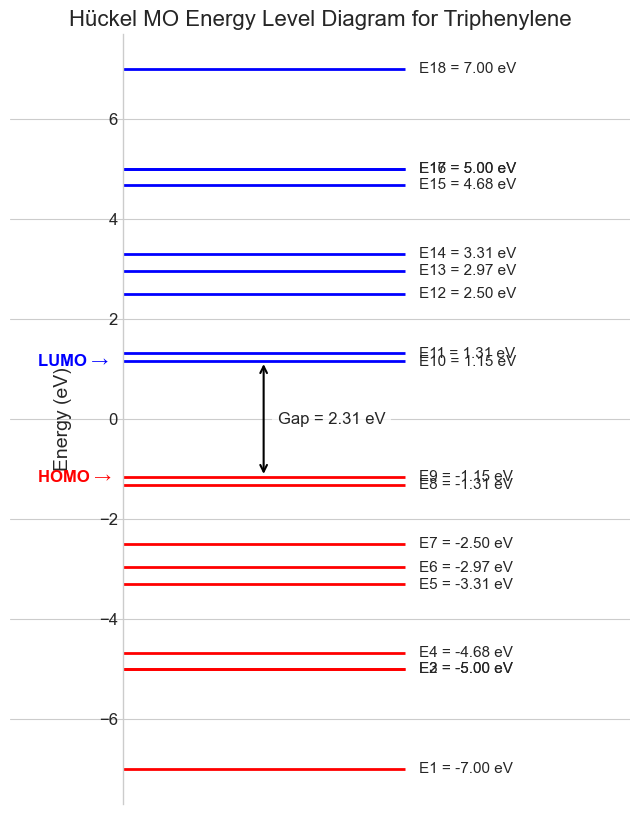

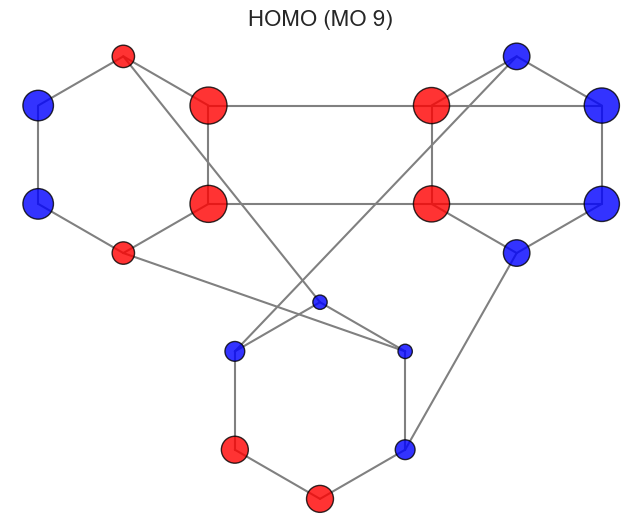

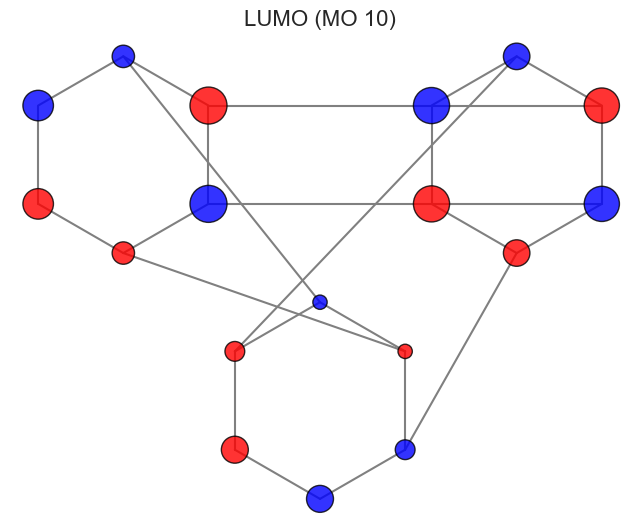

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# --- Plotting Style ---
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams.update({
    'font.size': 12,
    'axes.labelsize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12,
    'figure.figsize': (10, 6)
})

print("Libraries imported successfully.")

# --- Hückel Parameters (in eV) ---
# The Coulomb integral (α) is the energy of an electron in a 2p orbital. 
# It's set to 0 to serve as the energy reference.
ALPHA = 0.0

# The Resonance integral (β) is the interaction energy between adjacent p orbitals.
# It is a negative quantity, stabilizing the molecule.
BETA = -2.5

# --- Molecular Definition for Triphenylene ---
N_ATOMS = 18
PI_ELECTRONS = 18

# Connectivity defines which atoms are bonded. (1-based indexing)
CONNECTIVITY = [
    (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 1),
    (7, 8), (8, 9), (9, 10), (10, 11), (11, 12), (12, 7),
    (13, 14), (14, 15), (15, 16), (16, 17), (17, 18), (18, 13),
    (1, 7), (6, 12), (2, 13), (5, 18), (8, 14), (11, 17)
]

def build_huckel_matrix(n_atoms, connectivity, alpha=0.0, beta=-1.0):
    """
    Constructs the Hückel matrix based on molecular connectivity.

    Args:
        n_atoms (int): The number of atoms in the pi-system.
        connectivity (list of tuples): A list of bonded atom pairs (using 1-based indexing).
        alpha (float): The Coulomb integral (H_ii).
        beta (float): The Resonance integral (H_ij).

    Returns:
        numpy.ndarray: The (n_atoms x n_atoms) Hückel matrix.
    """
    h_matrix = np.full((n_atoms, n_atoms), alpha)
    for i, j in connectivity:
        # Adjust for 0-based indexing
        h_matrix[i-1, j-1] = beta
        h_matrix[j-1, i-1] = beta
    return h_matrix

def solve_huckel_system(h_matrix):
    """
    Diagonalizes the Hückel matrix to find energies and MO coefficients.

    Args:
        h_matrix (numpy.ndarray): The Hückel matrix.

    Returns:
        tuple: A tuple containing:
            - eigenvalues (numpy.ndarray): Sorted MO energies.
            - eigenvectors (numpy.ndarray): MO coefficients, where columns correspond to MOs.
    """
    eigenvalues, eigenvectors = np.linalg.eigh(h_matrix)
    # The columns of the eigenvectors matrix correspond to the eigenvalues
    return eigenvalues, eigenvectors

def analyze_pi_system(energies, pi_electrons, beta):
    """
    Calculates total pi-energy, delocalization energy, and identifies HOMO/LUMO.

    Args:
        energies (numpy.ndarray): Sorted MO energies.
        pi_electrons (int): The total number of pi-electrons.
        beta (float): The Resonance integral value.

    Returns:
        dict: A dictionary containing key energetic properties.
    """
    if pi_electrons % 2 != 0:
        raise ValueError("This analysis assumes a closed-shell system (even number of electrons).")
    
    num_occupied_mos = pi_electrons // 2
    occupied_energies = energies[:num_occupied_mos]
    
    # Total pi-electron energy
    total_pi_energy = 2 * np.sum(occupied_energies)
    
    # Delocalization energy (reference: isolated ethylene units)
    # Each localized double bond contributes 2α + 2β. For N/2 bonds, E = Nα + Nβ
    # Since α=0, the reference energy is pi_electrons * β.
    delocalization_energy = total_pi_energy - (pi_electrons * beta)
    
    # HOMO and LUMO
    homo_index = num_occupied_mos - 1
    lumo_index = num_occupied_mos
    
    homo_energy = energies[homo_index]
    lumo_energy = energies[lumo_index]
    homo_lumo_gap = lumo_energy - homo_energy
    
    return {
        "Total π-Energy (eV)": total_pi_energy,
        "Delocalization Energy (eV)": delocalization_energy,
        "HOMO Energy (eV)": homo_energy,
        "LUMO Energy (eV)": lumo_energy,
        "HOMO-LUMO Gap (eV)": homo_lumo_gap,
        "HOMO Index": homo_index,
        "LUMO Index": lumo_index
    }

# 1. Build the matrix
huckel_matrix = build_huckel_matrix(N_ATOMS, CONNECTIVITY, alpha=ALPHA, beta=BETA)

# 2. Solve for energies and MOs
mo_energies, mo_coeffs = solve_huckel_system(huckel_matrix)

# 3. Analyze the energetic properties
analysis = analyze_pi_system(mo_energies, PI_ELECTRONS, beta=BETA)

# --- Display Results ---
print("🔬 Hückel Analysis Results for Triphenylene 🔬")
print("-" * 50)

print("\nComputed Molecular Orbital Energies (eV):")
for i, energy in enumerate(mo_energies):
    occupancy = "Occupied" if i < PI_ELECTRONS // 2 else "Virtual"
    label = ""
    if i == analysis["HOMO Index"]:
        label = " (HOMO)"
    elif i == analysis["LUMO Index"]:
        label = " (LUMO)"
    print(f"  MO {i+1:<2}: {energy:8.3f} eV ({occupancy}){label}")

print("\n" + "-" * 50)
print("Energetic Properties Summary:")
print(f"  Total π-Electron Energy:   {analysis['Total π-Energy (eV)']:>8.3f} eV")
print(f"  Delocalization Energy:     {analysis['Delocalization Energy (eV)']:>8.3f} eV (relative to 9 ethylene units)")
print(f"  HOMO Energy:               {analysis['HOMO Energy (eV)']:>8.3f} eV")
print(f"  LUMO Energy:               {analysis['LUMO Energy (eV)']:>8.3f} eV")
print(f"  HOMO-LUMO Gap:             {analysis['HOMO-LUMO Gap (eV)']:>8.3f} eV")
print("-" * 50)

def plot_energy_levels(energies, pi_electrons, analysis_results):
    """Plots the MO energy level diagram."""
    homo_idx = analysis_results["HOMO Index"]
    lumo_idx = analysis_results["LUMO Index"]
    
    fig, ax = plt.subplots(figsize=(8, 10))
    
    # Draw energy levels
    for i, E in enumerate(energies):
        color = 'red' if i < pi_electrons // 2 else 'blue'
        ax.hlines(E, 0, 1, color=color, lw=2)
        ax.text(1.05, E, f'E{i+1} = {E:.2f} eV', va='center', fontsize=11)

    # Annotate HOMO and LUMO
    ax.text(-0.3, energies[homo_idx], 'HOMO →', va='center', ha='left', color='red', weight='bold')
    ax.text(-0.3, energies[lumo_idx], 'LUMO →', va='center', ha='left', color='blue', weight='bold')

    # Add HOMO-LUMO Gap arrow
    gap = analysis_results["HOMO-LUMO Gap (eV)"]
    ax.annotate("", xy=(0.5, energies[lumo_idx]), xytext=(0.5, energies[homo_idx]),
                arrowprops=dict(arrowstyle='<->', color='black', lw=1.5))
    ax.text(0.55, (energies[homo_idx] + energies[lumo_idx])/2, f'Gap = {gap:.2f} eV', 
            va='center', ha='left', bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))

    ax.set_xlim(-0.4, 1.8)
    ax.set_xticks([])
    ax.set_ylabel('Energy (eV)')
    ax.set_title('Hückel MO Energy Level Diagram for Triphenylene', fontsize=16)
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.yaxis.set_label_coords(0.1, 0.5)

    plt.show()

plot_energy_levels(mo_energies, PI_ELECTRONS, analysis)

def generate_triphenylene_coords():
    """Generates approximate 2D coordinates for triphenylene."""
    coords = {}
    rings_data = [
        ([-2.0, 1.0], [1, 2, 3, 4, 5, 6], np.pi/6),
        ([2.0, 1.0], [7, 8, 9, 10, 11, 12], np.pi/6),
        ([0.0, -1.5], [13, 14, 15, 16, 17, 18], np.pi/2)
    ]
    for center, atom_ids, start_angle in rings_data:
        for i, atom_id in enumerate(atom_ids):
            angle = i * np.pi / 3 + start_angle
            coords[atom_id] = np.array(center) + 1.0 * np.array([np.cos(angle), np.sin(angle)])
    return coords

def plot_molecular_orbital(coeffs, coords, connectivity, title=""):
    """Plots the MO coefficients on the molecular structure."""
    fig, ax = plt.subplots(figsize=(8, 8))
    
    # Plot bonds
    for i, j in connectivity:
        x_coords = [coords[i][0], coords[j][0]]
        y_coords = [coords[i][1], coords[j][1]]
        ax.plot(x_coords, y_coords, color='gray', linewidth=1.5, zorder=1)

    # Plot atoms with coefficients
    pos_mask = coeffs > 0.01
    neg_mask = coeffs < -0.01
    
    # Positive lobes
    ax.scatter(
        [coords[i+1][0] for i, c in enumerate(coeffs) if pos_mask[i]],
        [coords[i+1][1] for i, c in enumerate(coeffs) if pos_mask[i]],
        s=2000 * abs(coeffs[pos_mask]), c='red', alpha=0.8, zorder=2, edgecolors='black'
    )
    # Negative lobes
    ax.scatter(
        [coords[i+1][0] for i, c in enumerate(coeffs) if neg_mask[i]],
        [coords[i+1][1] for i, c in enumerate(coeffs) if neg_mask[i]],
        s=2000 * abs(coeffs[neg_mask]), c='blue', alpha=0.8, zorder=2, edgecolors='black'
    )
    
    ax.set_aspect('equal')
    ax.axis('off')
    ax.set_title(title, fontsize=16)
    plt.show()

# --- Generate Plots for Frontier Orbitals ---
coords = generate_triphenylene_coords()
homo_idx = analysis["HOMO Index"]
lumo_idx = analysis["LUMO Index"]

# Plot HOMO
plot_molecular_orbital(
    mo_coeffs[:, homo_idx], 
    coords, 
    CONNECTIVITY, 
    title=f'HOMO (MO {homo_idx + 1})'
)

# Plot LUMO
plot_molecular_orbital(
    mo_coeffs[:, lumo_idx], 
    coords, 
    CONNECTIVITY, 
    title=f'LUMO (MO {lumo_idx + 1})'
)

Libraries imported successfully.
🔬 Hückel Analysis Results for Triazatriphenylene 🔬
--------------------------------------------------

Computed Molecular Orbital Energies (eV):
  MO 1 :   -6.802 eV (Occupied)
  MO 2 :   -4.942 eV (Occupied)
  MO 3 :   -4.890 eV (Occupied)
  MO 4 :   -4.633 eV (Occupied)
  MO 5 :   -3.295 eV (Occupied)
  MO 6 :   -3.094 eV (Occupied)
  MO 7 :   -2.500 eV (Occupied)
  MO 8 :   -1.431 eV (Occupied)
  MO 9 :   -1.232 eV (Occupied) (HOMO)
  MO 10:    0.830 eV (Virtual) (LUMO)
  MO 11:    0.987 eV (Virtual)
  MO 12:    2.063 eV (Virtual)
  MO 13:    2.500 eV (Virtual)
  MO 14:    3.163 eV (Virtual)
  MO 15:    3.498 eV (Virtual)
  MO 16:    4.618 eV (Virtual)
  MO 17:    4.826 eV (Virtual)
  MO 18:    6.584 eV (Virtual)

--------------------------------------------------
Energetic Properties Summary:
  Total π-Electron Energy:    -65.638 eV
  HOMO Energy:                 -1.232 eV
  LUMO Energy:                  0.830 eV
  HOMO-LUMO Gap:                2.06

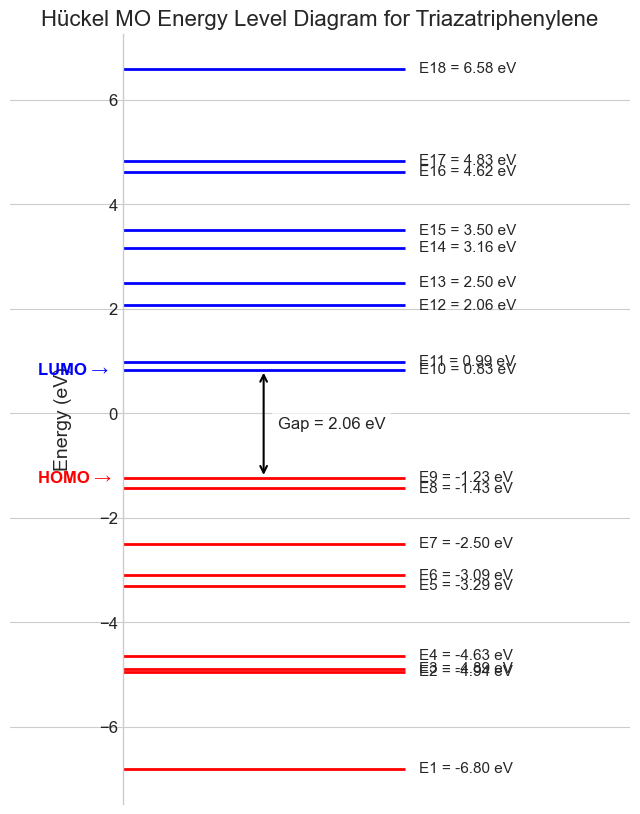

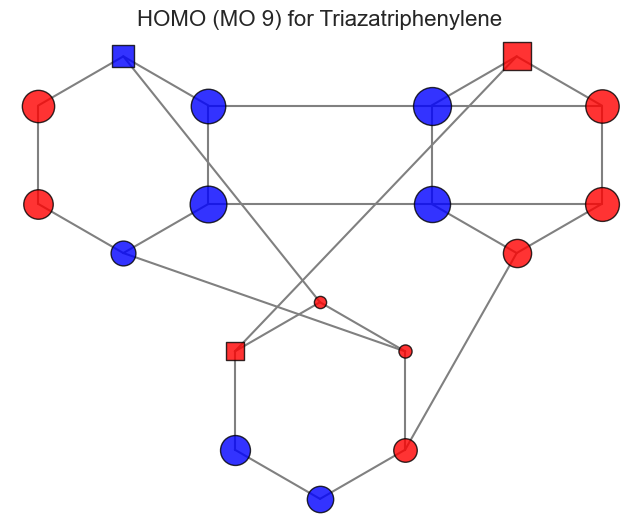

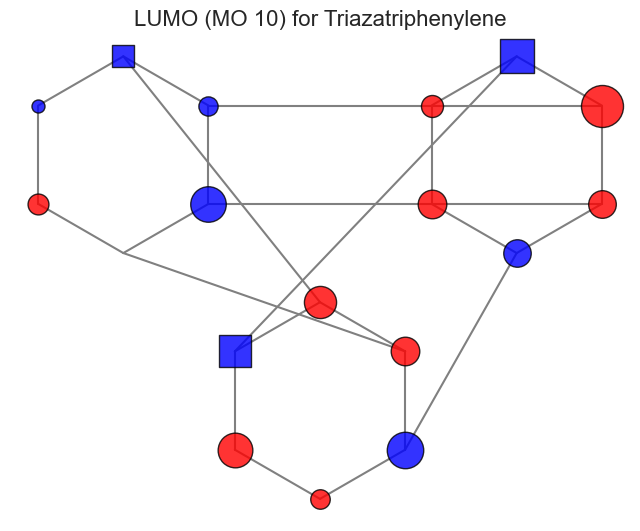

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# --- Plotting Style ---
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams.update({
    'font.size': 12,
    'axes.labelsize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12,
    'figure.figsize': (10, 6)
})

print("Libraries imported successfully.")

# --- Hückel Parameters (in eV) ---
ALPHA_C = 0.0      # Reference Coulomb integral for Carbon
BETA_CC = -2.5     # Reference Resonance integral for C-C bonds

# --- Heteroatom Parameters for Pyridine-like Nitrogen ---
H_N = 0.5
K_CN = 0.8

# --- Molecular Definition ---
N_ATOMS = 18
PI_ELECTRONS = 18

# Nitrogen atom positions (1-based indexing)
NITROGEN_SITES = [2, 8, 14]

# Connectivity remains the same as the triphenylene skeleton
CONNECTIVITY = [
    (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 1),
    (7, 8), (8, 9), (9, 10), (10, 11), (11, 12), (12, 7),
    (13, 14), (14, 15), (15, 16), (16, 17), (17, 18), (18, 13),
    (1, 7), (6, 12), (2, 13), (5, 18), (8, 14), (11, 17)
]

def build_hetero_huckel_matrix(n_atoms, connectivity, nitrogen_sites, alpha_c, beta_cc, h_n, k_cn):
    """
    Constructs the Hückel matrix for a system with C and N atoms.

    Args:
        n_atoms (int): Total number of atoms in the pi-system.
        connectivity (list): List of bonded atom pairs (1-based).
        nitrogen_sites (list): List of positions of nitrogen atoms (1-based).
        alpha_c (float): Coulomb integral for carbon.
        beta_cc (float): Resonance integral for C-C bonds.
        h_n (float): Parameter `h` for nitrogen.
        k_cn (float): Parameter `k` for C-N bonds.

    Returns:
        numpy.ndarray: The (n_atoms x n_atoms) Hückel matrix.
    """
    h_matrix = np.full((n_atoms, n_atoms), 0.0) # Start with a zero matrix

    # 1. Set diagonal elements (Coulomb integrals)
    alpha_n = alpha_c + h_n * beta_cc
    for i in range(n_atoms):
        if (i + 1) in nitrogen_sites:
            h_matrix[i, i] = alpha_n  # Nitrogen alpha
        else:
            h_matrix[i, i] = alpha_c   # Carbon alpha
            
    # 2. Set off-diagonal elements (Resonance integrals)
    beta_cn = k_cn * beta_cc
    for i, j in connectivity:
        # Convert to 0-based index
        idx1, idx2 = i - 1, j - 1
        
        # Check if the bond involves a nitrogen atom
        is_n1 = (i in nitrogen_sites)
        is_n2 = (j in nitrogen_sites)
        
        if is_n1 or is_n2:
            h_matrix[idx1, idx2] = h_matrix[idx2, idx1] = beta_cn
        else:
            h_matrix[idx1, idx2] = h_matrix[idx2, idx1] = beta_cc
            
    return h_matrix

def solve_huckel_system(h_matrix):
    """Diagonalizes the Hückel matrix (unchanged)."""
    eigenvalues, eigenvectors = np.linalg.eigh(h_matrix)
    return eigenvalues, eigenvectors

def analyze_pi_system(energies, pi_electrons, beta):
    """Calculates key energetic properties (unchanged)."""
    num_occupied_mos = pi_electrons // 2
    occupied_energies = energies[:num_occupied_mos]
    total_pi_energy = 2 * np.sum(occupied_energies)
    homo_index = num_occupied_mos - 1
    lumo_index = num_occupied_mos
    
    return {
        "Total π-Energy (eV)": total_pi_energy,
        "HOMO Energy (eV)": energies[homo_index],
        "LUMO Energy (eV)": energies[lumo_index],
        "HOMO-LUMO Gap (eV)": energies[lumo_index] - energies[homo_index],
        "HOMO Index": homo_index,
        "LUMO Index": lumo_index
    }

# 1. Build the matrix using the new function
huckel_matrix = build_hetero_huckel_matrix(
    N_ATOMS, CONNECTIVITY, NITROGEN_SITES, ALPHA_C, BETA_CC, H_N, K_CN
)

# 2. Solve for energies and MOs
mo_energies, mo_coeffs = solve_huckel_system(huckel_matrix)

# 3. Analyze the energetic properties
analysis = analyze_pi_system(mo_energies, PI_ELECTRONS, beta=BETA_CC)

# --- Display Results ---
print("🔬 Hückel Analysis Results for Triazatriphenylene 🔬")
print("-" * 50)

print("\nComputed Molecular Orbital Energies (eV):")
for i, energy in enumerate(mo_energies):
    occupancy = "Occupied" if i < PI_ELECTRONS // 2 else "Virtual"
    label = ""
    if i == analysis["HOMO Index"]:
        label = " (HOMO)"
    elif i == analysis["LUMO Index"]:
        label = " (LUMO)"
    print(f"  MO {i+1:<2}: {energy:8.3f} eV ({occupancy}){label}")

print("\n" + "-" * 50)
print("Energetic Properties Summary:")
print(f"  Total π-Electron Energy:   {analysis['Total π-Energy (eV)']:>8.3f} eV")
print(f"  HOMO Energy:               {analysis['HOMO Energy (eV)']:>8.3f} eV")
print(f"  LUMO Energy:               {analysis['LUMO Energy (eV)']:>8.3f} eV")
print(f"  HOMO-LUMO Gap:             {analysis['HOMO-LUMO Gap (eV)']:>8.3f} eV")
print("-" * 50)

def plot_energy_levels(energies, pi_electrons, analysis_results):
    """Plots the MO energy level diagram."""
    homo_idx = analysis_results["HOMO Index"]
    lumo_idx = analysis_results["LUMO Index"]
    
    fig, ax = plt.subplots(figsize=(8, 10))
    
    # Draw energy levels
    for i, E in enumerate(energies):
        color = 'red' if i < pi_electrons // 2 else 'blue'
        ax.hlines(E, 0, 1, color=color, lw=2)
        ax.text(1.05, E, f'E{i+1} = {E:.2f} eV', va='center', fontsize=11)

    # Annotate HOMO and LUMO
    ax.text(-0.3, energies[homo_idx], 'HOMO →', va='center', ha='left', color='red', weight='bold')
    ax.text(-0.3, energies[lumo_idx], 'LUMO →', va='center', ha='left', color='blue', weight='bold')

    # Add HOMO-LUMO Gap arrow
    gap = analysis_results["HOMO-LUMO Gap (eV)"]
    ax.annotate("", xy=(0.5, energies[lumo_idx]), xytext=(0.5, energies[homo_idx]),
                arrowprops=dict(arrowstyle='<->', color='black', lw=1.5))
    ax.text(0.55, (energies[homo_idx] + energies[lumo_idx])/2, f'Gap = {gap:.2f} eV', 
            va='center', ha='left', bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))

    ax.set_xlim(-0.4, 1.8)
    ax.set_xticks([])
    ax.set_ylabel('Energy (eV)')
    ax.set_title('Hückel MO Energy Level Diagram for Triazatriphenylene', fontsize=16)
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.yaxis.set_label_coords(0.1, 0.5)

    plt.show()

plot_energy_levels(mo_energies, PI_ELECTRONS, analysis)

def generate_triphenylene_coords():
    """Generates approximate 2D coordinates for triphenylene."""
    coords = {}
    rings_data = [
        ([-2.0, 1.0], [1, 2, 3, 4, 5, 6], np.pi/6),
        ([2.0, 1.0], [7, 8, 9, 10, 11, 12], np.pi/6),
        ([0.0, -1.5], [13, 14, 15, 16, 17, 18], np.pi/2)
    ]
    for center, atom_ids, start_angle in rings_data:
        for i, atom_id in enumerate(atom_ids):
            angle = i * np.pi / 3 + start_angle
            coords[atom_id] = np.array(center) + 1.0 * np.array([np.cos(angle), np.sin(angle)])
    return coords

def plot_hetero_molecular_orbital(coeffs, coords, connectivity, nitrogen_sites, title=""):
    """Plots the MO coefficients, distinguishing C and N atoms."""
    fig, ax = plt.subplots(figsize=(8, 8))
    
    # Plot bonds
    for i, j in connectivity:
        ax.plot([coords[i][0], coords[j][0]], [coords[i][1], coords[j][1]], color='gray', lw=1.5, zorder=1)

    # Plot lobes for each atom
    for i, coeff in enumerate(coeffs):
        atom_id = i + 1
        pos = coords[atom_id]
        is_nitrogen = atom_id in nitrogen_sites
        marker = 's' if is_nitrogen else 'o' # Square for N, Circle for C
        
        if abs(coeff) > 0.01:
            color = 'red' if coeff > 0 else 'blue'
            ax.scatter(pos[0], pos[1], s=2000 * abs(coeff), c=color, alpha=0.8, 
                       zorder=2, edgecolors='black', marker=marker)

    ax.set_aspect('equal')
    ax.axis('off')
    ax.set_title(title, fontsize=16)
    plt.show()

# --- Generate Plots for Frontier Orbitals ---
coords = generate_triphenylene_coords()
homo_idx = analysis["HOMO Index"]
lumo_idx = analysis["LUMO Index"]

plot_hetero_molecular_orbital(
    mo_coeffs[:, homo_idx], coords, CONNECTIVITY, NITROGEN_SITES,
    title=f'HOMO (MO {homo_idx + 1}) for Triazatriphenylene'
)

plot_hetero_molecular_orbital(
    mo_coeffs[:, lumo_idx], coords, CONNECTIVITY, NITROGEN_SITES,
    title=f'LUMO (MO {lumo_idx + 1}) for Triazatriphenylene'
)

Libraries imported successfully.
🔬 Hückel Analysis Results for Hexaazatriphenylene 🔬
--------------------------------------------------

Computed Molecular Orbital Energies (eV):
  MO 1 :   -6.578 eV (Occupied)
  MO 2 :   -4.887 eV (Occupied)
  MO 3 :   -4.770 eV (Occupied)
  MO 4 :   -4.610 eV (Occupied)
  MO 5 :   -3.281 eV (Occupied)
  MO 6 :   -3.181 eV (Occupied)
  MO 7 :   -2.500 eV (Occupied)
  MO 8 :   -1.523 eV (Occupied)
  MO 9 :   -1.349 eV (Occupied) (HOMO)
  MO 10:    0.452 eV (Virtual) (LUMO)
  MO 11:    0.917 eV (Virtual)
  MO 12:    1.345 eV (Virtual)
  MO 13:    2.500 eV (Virtual)
  MO 14:    2.817 eV (Virtual)
  MO 15:    3.056 eV (Virtual)
  MO 16:    3.833 eV (Virtual)
  MO 17:    4.340 eV (Virtual)
  MO 18:    5.919 eV (Virtual)

--------------------------------------------------
Energetic Properties Summary:
  Total π-Electron Energy:    -65.359 eV
  HOMO Energy:                 -1.349 eV
  LUMO Energy:                  0.452 eV
  HOMO-LUMO Gap:                1.8

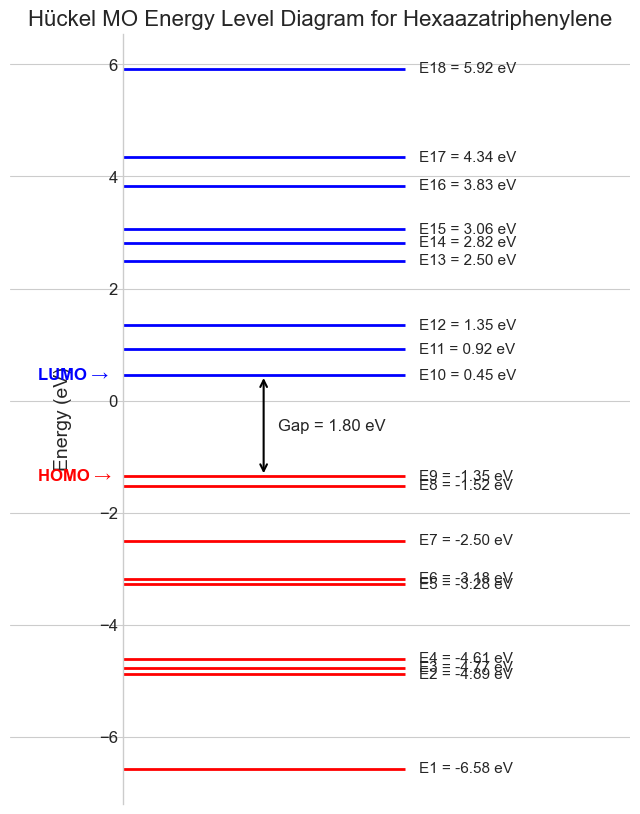

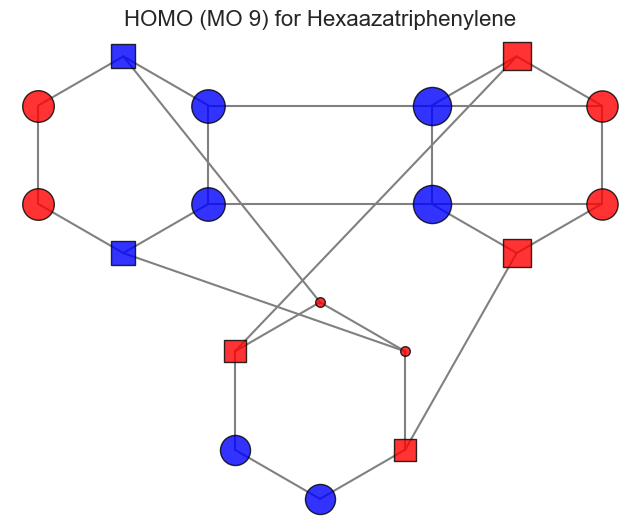

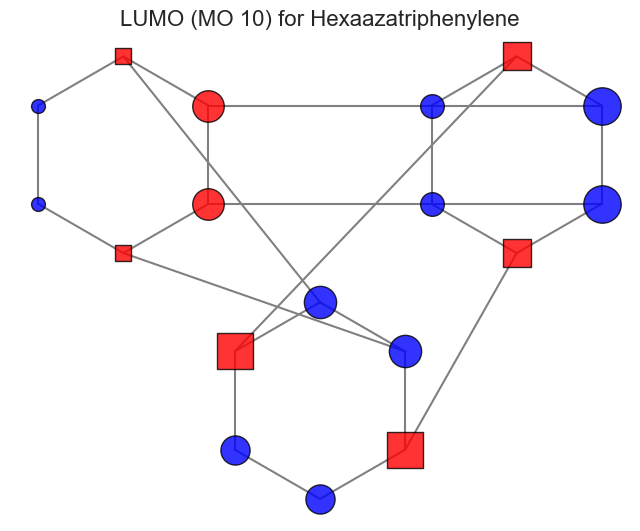

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# --- Plotting Style ---
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams.update({
    'font.size': 12,
    'axes.labelsize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12,
    'figure.figsize': (10, 6)
})

print("Libraries imported successfully.")

# --- Hückel Parameters (in eV) ---
ALPHA_C = 0.0      # Reference Coulomb integral for Carbon
BETA_CC = -2.5     # Reference Resonance integral for C-C bonds

# --- Heteroatom Parameters for Pyridine-like Nitrogen ---
H_N = 0.5
K_CN = 0.8

# --- Molecular Definition ---
N_ATOMS = 18
PI_ELECTRONS = 18

# Nitrogen atom positions (1-based indexing)
NITROGEN_SITES = [2, 5, 8, 11, 14, 17]

# Connectivity remains the same as the triphenylene skeleton
CONNECTIVITY = [
    (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 1),
    (7, 8), (8, 9), (9, 10), (10, 11), (11, 12), (12, 7),
    (13, 14), (14, 15), (15, 16), (16, 17), (17, 18), (18, 13),
    (1, 7), (6, 12), (2, 13), (5, 18), (8, 14), (11, 17)
]

def build_hetero_huckel_matrix(n_atoms, connectivity, nitrogen_sites, alpha_c, beta_cc, h_n, k_cn):
    """
    Constructs the Hückel matrix for a system with C and N atoms.
    (Unchanged from previous notebook)
    """
    h_matrix = np.full((n_atoms, n_atoms), 0.0)

    # 1. Set diagonal elements
    alpha_n = alpha_c + h_n * beta_cc
    for i in range(n_atoms):
        if (i + 1) in nitrogen_sites:
            h_matrix[i, i] = alpha_n
        else:
            h_matrix[i, i] = alpha_c
            
    # 2. Set off-diagonal elements
    beta_cn = k_cn * beta_cc
    for i, j in connectivity:
        idx1, idx2 = i - 1, j - 1
        is_n1 = (i in nitrogen_sites)
        is_n2 = (j in nitrogen_sites)
        
        # This logic handles C-C, C-N, and N-N bonds if they were to exist
        if is_n1 and is_n2: # N-N bond (not in this molecule, but for generality)
             h_matrix[idx1, idx2] = h_matrix[idx2, idx1] = beta_cn 
        elif is_n1 or is_n2: # C-N bond
            h_matrix[idx1, idx2] = h_matrix[idx2, idx1] = beta_cn
        else: # C-C bond
            h_matrix[idx1, idx2] = h_matrix[idx2, idx1] = beta_cc
            
    return h_matrix

def solve_huckel_system(h_matrix):
    """Diagonalizes the Hückel matrix (unchanged)."""
    eigenvalues, eigenvectors = np.linalg.eigh(h_matrix)
    return eigenvalues, eigenvectors

def analyze_pi_system(energies, pi_electrons, beta):
    """Calculates key energetic properties (unchanged)."""
    num_occupied_mos = pi_electrons // 2
    occupied_energies = energies[:num_occupied_mos]
    total_pi_energy = 2 * np.sum(occupied_energies)
    homo_index = num_occupied_mos - 1
    lumo_index = num_occupied_mos
    
    return {
        "Total π-Energy (eV)": total_pi_energy,
        "HOMO Energy (eV)": energies[homo_index],
        "LUMO Energy (eV)": energies[lumo_index],
        "HOMO-LUMO Gap (eV)": energies[lumo_index] - energies[homo_index],
        "HOMO Index": homo_index,
        "LUMO Index": lumo_index
    }

# 1. Build the matrix
huckel_matrix = build_hetero_huckel_matrix(
    N_ATOMS, CONNECTIVITY, NITROGEN_SITES, ALPHA_C, BETA_CC, H_N, K_CN
)

# 2. Solve for energies and MOs
mo_energies, mo_coeffs = solve_huckel_system(huckel_matrix)

# 3. Analyze the energetic properties
analysis = analyze_pi_system(mo_energies, PI_ELECTRONS, beta=BETA_CC)

# --- Display Results ---
print("🔬 Hückel Analysis Results for Hexaazatriphenylene 🔬")
print("-" * 50)

print("\nComputed Molecular Orbital Energies (eV):")
for i, energy in enumerate(mo_energies):
    occupancy = "Occupied" if i < PI_ELECTRONS // 2 else "Virtual"
    label = ""
    if i == analysis["HOMO Index"]:
        label = " (HOMO)"
    elif i == analysis["LUMO Index"]:
        label = " (LUMO)"
    print(f"  MO {i+1:<2}: {energy:8.3f} eV ({occupancy}){label}")

print("\n" + "-" * 50)
print("Energetic Properties Summary:")
print(f"  Total π-Electron Energy:   {analysis['Total π-Energy (eV)']:>8.3f} eV")
print(f"  HOMO Energy:               {analysis['HOMO Energy (eV)']:>8.3f} eV")
print(f"  LUMO Energy:               {analysis['LUMO Energy (eV)']:>8.3f} eV")
print(f"  HOMO-LUMO Gap:             {analysis['HOMO-LUMO Gap (eV)']:>8.3f} eV")
print("-" * 50)

def plot_energy_levels(energies, pi_electrons, analysis_results):
    """Plots the MO energy level diagram."""
    homo_idx = analysis_results["HOMO Index"]
    lumo_idx = analysis_results["LUMO Index"]
    
    fig, ax = plt.subplots(figsize=(8, 10))
    
    # Draw energy levels
    for i, E in enumerate(energies):
        color = 'red' if i < pi_electrons // 2 else 'blue'
        ax.hlines(E, 0, 1, color=color, lw=2)
        ax.text(1.05, E, f'E{i+1} = {E:.2f} eV', va='center', fontsize=11)

    # Annotate HOMO and LUMO
    ax.text(-0.3, energies[homo_idx], 'HOMO →', va='center', ha='left', color='red', weight='bold')
    ax.text(-0.3, energies[lumo_idx], 'LUMO →', va='center', ha='left', color='blue', weight='bold')

    # Add HOMO-LUMO Gap arrow
    gap = analysis_results["HOMO-LUMO Gap (eV)"]
    ax.annotate("", xy=(0.5, energies[lumo_idx]), xytext=(0.5, energies[homo_idx]),
                arrowprops=dict(arrowstyle='<->', color='black', lw=1.5))
    ax.text(0.55, (energies[homo_idx] + energies[lumo_idx])/2, f'Gap = {gap:.2f} eV', 
            va='center', ha='left', bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))

    ax.set_xlim(-0.4, 1.8)
    ax.set_xticks([])
    ax.set_ylabel('Energy (eV)')
    ax.set_title('Hückel MO Energy Level Diagram for Hexaazatriphenylene', fontsize=16)
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.yaxis.set_label_coords(0.1, 0.5)

    plt.show()

plot_energy_levels(mo_energies, PI_ELECTRONS, analysis)

def generate_triphenylene_coords():
    """Generates approximate 2D coordinates for triphenylene."""
    coords = {}
    rings_data = [
        ([-2.0, 1.0], [1, 2, 3, 4, 5, 6], np.pi/6),
        ([2.0, 1.0], [7, 8, 9, 10, 11, 12], np.pi/6),
        ([0.0, -1.5], [13, 14, 15, 16, 17, 18], np.pi/2)
    ]
    for center, atom_ids, start_angle in rings_data:
        for i, atom_id in enumerate(atom_ids):
            angle = i * np.pi / 3 + start_angle
            coords[atom_id] = np.array(center) + 1.0 * np.array([np.cos(angle), np.sin(angle)])
    return coords

def plot_hetero_molecular_orbital(coeffs, coords, connectivity, nitrogen_sites, title=""):
    """Plots the MO coefficients, distinguishing C and N atoms."""
    fig, ax = plt.subplots(figsize=(8, 8))
    
    # Plot bonds
    for i, j in connectivity:
        ax.plot([coords[i][0], coords[j][0]], [coords[i][1], coords[j][1]], color='gray', lw=1.5, zorder=1)

    # Plot lobes for each atom
    for i, coeff in enumerate(coeffs):
        atom_id = i + 1
        pos = coords[atom_id]
        is_nitrogen = atom_id in nitrogen_sites
        marker = 's' if is_nitrogen else 'o' # Square for N, Circle for C
        
        if abs(coeff) > 0.01:
            color = 'red' if coeff > 0 else 'blue'
            ax.scatter(pos[0], pos[1], s=2000 * abs(coeff), c=color, alpha=0.8, 
                       zorder=2, edgecolors='black', marker=marker)

    ax.set_aspect('equal')
    ax.axis('off')
    ax.set_title(title, fontsize=16)
    plt.show()

# --- Generate Plots for Frontier Orbitals ---
coords = generate_triphenylene_coords()
homo_idx = analysis["HOMO Index"]
lumo_idx = analysis["LUMO Index"]

plot_hetero_molecular_orbital(
    mo_coeffs[:, homo_idx], coords, CONNECTIVITY, NITROGEN_SITES,
    title=f'HOMO (MO {homo_idx + 1}) for Hexaazatriphenylene'
)

plot_hetero_molecular_orbital(
    mo_coeffs[:, lumo_idx], coords, CONNECTIVITY, NITROGEN_SITES,
    title=f'LUMO (MO {lumo_idx + 1}) for Hexaazatriphenylene'
)

Libraries imported successfully.
🔬 Hückel Analysis Results for Oxepine 🔬
--------------------------------------------------

Computed Molecular Orbital Energies (eV):
  MO 1 :   -6.520 eV (Occupied)
  MO 2 :   -4.177 eV (Occupied)
  MO 3 :   -3.117 eV (Occupied)
  MO 4 :   -0.296 eV (Occupied) (HOMO)
  MO 5 :    1.113 eV (Virtual) (LUMO)
  MO 6 :    3.493 eV (Virtual)
  MO 7 :    4.505 eV (Virtual)

--------------------------------------------------
Energetic Properties Summary:
  Total π-Electron Energy:    -28.221 eV
  HOMO Energy:                 -0.296 eV
  LUMO Energy:                  1.113 eV
  HOMO-LUMO Gap:                1.408 eV
--------------------------------------------------


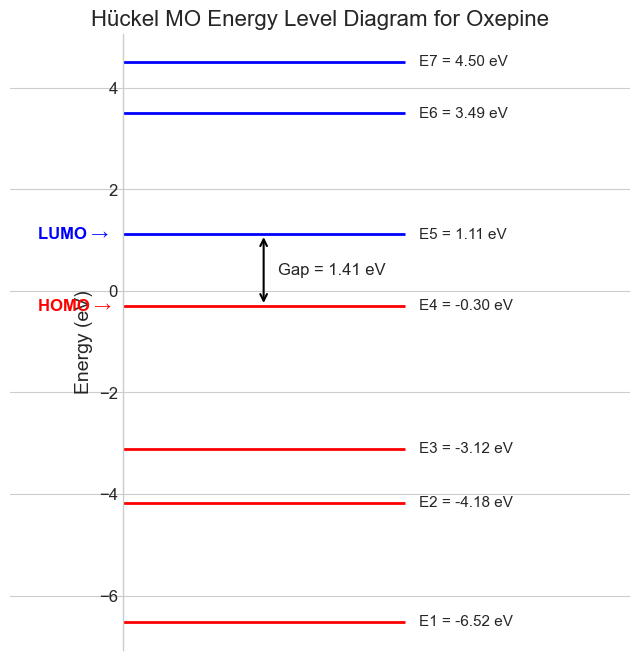

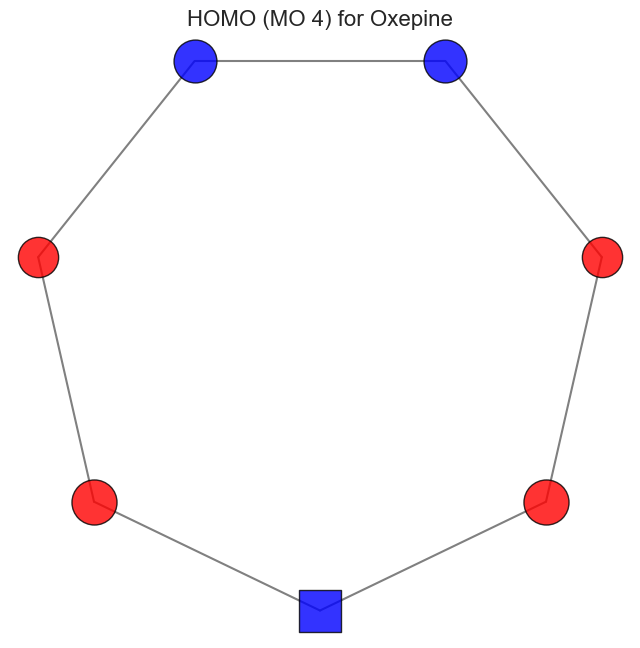

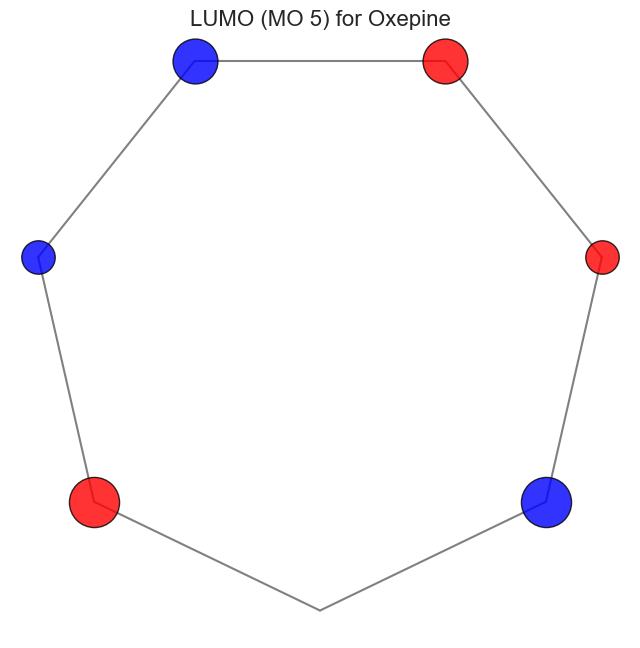

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# --- Plotting Style ---
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams.update({
    'font.size': 12,
    'axes.labelsize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12,
    'figure.figsize': (10, 6)
})

print("Libraries imported successfully.")

# --- Hückel Parameters (in eV) ---
ALPHA_C = 0.0      # Reference Coulomb integral for Carbon
BETA_CC = -2.5     # Reference Resonance integral for C-C bonds

# --- Heteroatom Parameters for Ether-like Oxygen ---
H_O_DDOT = 2.0
K_CO = 0.8

# --- Molecular Definition ---
N_ATOMS = 7
PI_ELECTRONS = 8

# A dictionary to define heteroatoms and their parameters.
# Key = atom position (1-based), Value = dict of parameters.
HETEROATOMS = {
    1: {'h': H_O_DDOT, 'k': K_CO, 'label': 'O'} # Oxygen is at position 1
}

# Connectivity for a 7-membered ring
CONNECTIVITY = [
    (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 1)
]

def build_huckel_matrix(n_atoms, connectivity, heteroatoms, alpha_c, beta_cc):
    """
    Constructs a generalized Hückel matrix for a system with heteroatoms.

    Args:
        n_atoms (int): Total number of atoms in the pi-system.
        connectivity (list): List of bonded atom pairs (1-based).
        heteroatoms (dict): Dictionary defining heteroatoms and their parameters.
        alpha_c (float): Coulomb integral for carbon.
        beta_cc (float): Resonance integral for C-C bonds.

    Returns:
        numpy.ndarray: The (n_atoms x n_atoms) Hückel matrix.
    """
    h_matrix = np.full((n_atoms, n_atoms), 0.0)

    # 1. Set diagonal elements (Coulomb integrals)
    for i in range(n_atoms):
        atom_id = i + 1
        if atom_id in heteroatoms:
            h_param = heteroatoms[atom_id]['h']
            h_matrix[i, i] = alpha_c + h_param * beta_cc
        else:
            h_matrix[i, i] = alpha_c
            
    # 2. Set off-diagonal elements (Resonance integrals)
    for i, j in connectivity:
        idx1, idx2 = i - 1, j - 1
        
        # Check if the bond involves heteroatoms to find the correct k parameter
        k_param = 1.0 # Default for C-C bonds
        if i in heteroatoms:
            k_param = heteroatoms[i]['k']
        elif j in heteroatoms:
            k_param = heteroatoms[j]['k']
            
        h_matrix[idx1, idx2] = h_matrix[idx2, idx1] = k_param * beta_cc
            
    return h_matrix

def solve_huckel_system(h_matrix):
    """Diagonalizes the Hückel matrix (unchanged)."""
    eigenvalues, eigenvectors = np.linalg.eigh(h_matrix)
    return eigenvalues, eigenvectors

def analyze_pi_system(energies, pi_electrons):
    """Calculates key energetic properties (unchanged)."""
    num_occupied_mos = pi_electrons // 2
    occupied_energies = energies[:num_occupied_mos]
    total_pi_energy = 2 * np.sum(occupied_energies)
    homo_index = num_occupied_mos - 1
    lumo_index = num_occupied_mos
    
    return {
        "Total π-Energy (eV)": total_pi_energy,
        "HOMO Energy (eV)": energies[homo_index],
        "LUMO Energy (eV)": energies[lumo_index],
        "HOMO-LUMO Gap (eV)": energies[lumo_index] - energies[homo_index],
        "HOMO Index": homo_index,
        "LUMO Index": lumo_index
    }

# 1. Build the matrix
huckel_matrix = build_huckel_matrix(
    N_ATOMS, CONNECTIVITY, HETEROATOMS, ALPHA_C, BETA_CC
)

# 2. Solve for energies and MOs
mo_energies, mo_coeffs = solve_huckel_system(huckel_matrix)

# 3. Analyze the energetic properties
analysis = analyze_pi_system(mo_energies, PI_ELECTRONS)

# --- Display Results ---
print("🔬 Hückel Analysis Results for Oxepine 🔬")
print("-" * 50)

print("\nComputed Molecular Orbital Energies (eV):")
for i, energy in enumerate(mo_energies):
    occupancy = "Occupied" if i < PI_ELECTRONS // 2 else "Virtual"
    label = ""
    if i == analysis["HOMO Index"]:
        label = " (HOMO)"
    elif i == analysis["LUMO Index"]:
        label = " (LUMO)"
    print(f"  MO {i+1:<2}: {energy:8.3f} eV ({occupancy}){label}")

print("\n" + "-" * 50)
print("Energetic Properties Summary:")
print(f"  Total π-Electron Energy:   {analysis['Total π-Energy (eV)']:>8.3f} eV")
print(f"  HOMO Energy:               {analysis['HOMO Energy (eV)']:>8.3f} eV")
print(f"  LUMO Energy:               {analysis['LUMO Energy (eV)']:>8.3f} eV")
print(f"  HOMO-LUMO Gap:             {analysis['HOMO-LUMO Gap (eV)']:>8.3f} eV")
print("-" * 50)

def plot_energy_levels(energies, pi_electrons, analysis_results, title):
    """Plots the MO energy level diagram."""
    homo_idx = analysis_results["HOMO Index"]
    lumo_idx = analysis_results["LUMO Index"]
    
    fig, ax = plt.subplots(figsize=(8, 8))
    
    # Draw energy levels
    for i, E in enumerate(energies):
        color = 'red' if i < pi_electrons // 2 else 'blue'
        ax.hlines(E, 0, 1, color=color, lw=2)
        ax.text(1.05, E, f'E{i+1} = {E:.2f} eV', va='center', fontsize=11)

    # Annotate HOMO and LUMO
    ax.text(-0.3, energies[homo_idx], 'HOMO →', va='center', ha='left', color='red', weight='bold')
    ax.text(-0.3, energies[lumo_idx], 'LUMO →', va='center', ha='left', color='blue', weight='bold')

    gap = analysis_results["HOMO-LUMO Gap (eV)"]
    ax.annotate("", xy=(0.5, energies[lumo_idx]), xytext=(0.5, energies[homo_idx]),
                arrowprops=dict(arrowstyle='<->', color='black', lw=1.5))
    ax.text(0.55, (energies[homo_idx] + energies[lumo_idx])/2, f'Gap = {gap:.2f} eV', 
            va='center', ha='left', bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))

    ax.set_xlim(-0.4, 1.8)
    ax.set_xticks([])
    ax.set_ylabel('Energy (eV)')
    ax.set_title(title, fontsize=16)
    ax.spines['left'].set_position(('data', 0))
    ax.spines['bottom'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')

    plt.show()

plot_energy_levels(mo_energies, PI_ELECTRONS, analysis, 'Hückel MO Energy Level Diagram for Oxepine')

def generate_polygon_coords(n_atoms):
    """Generates coordinates for a regular n-sided polygon."""
    coords = {}
    radius = 1.5
    for i in range(n_atoms):
        angle = 2 * np.pi * i / n_atoms - np.pi / 2 # Start from the top
        coords[i + 1] = (radius * np.cos(angle), radius * np.sin(angle))
    return coords

def plot_hetero_molecular_orbital(coeffs, coords, connectivity, heteroatoms, title=""):
    """Plots MO coefficients, distinguishing atom types."""
    fig, ax = plt.subplots(figsize=(8, 8))
    
    for i, j in connectivity:
        ax.plot([coords[i][0], coords[j][0]], [coords[i][1], coords[j][1]], color='gray', lw=1.5, zorder=1)

    for i, coeff in enumerate(coeffs):
        atom_id = i + 1
        pos = coords[atom_id]
        marker = 'o' # Default for Carbon
        if atom_id in heteroatoms:
            marker = 's' if heteroatoms[atom_id]['label'] == 'O' else 'v'
        
        if abs(coeff) > 0.01:
            color = 'red' if coeff > 0 else 'blue'
            ax.scatter(pos[0], pos[1], s=2500 * abs(coeff), c=color, alpha=0.8, 
                       zorder=2, edgecolors='black', marker=marker)

    ax.set_aspect('equal')
    ax.axis('off')
    ax.set_title(title, fontsize=16)
    plt.show()

# --- Generate Plots for Frontier Orbitals ---
coords = generate_polygon_coords(N_ATOMS)
homo_idx = analysis["HOMO Index"]
lumo_idx = analysis["LUMO Index"]

plot_hetero_molecular_orbital(
    mo_coeffs[:, homo_idx], coords, CONNECTIVITY, HETEROATOMS,
    title=f'HOMO (MO {homo_idx + 1}) for Oxepine'
)

plot_hetero_molecular_orbital(
    mo_coeffs[:, lumo_idx], coords, CONNECTIVITY, HETEROATOMS,
    title=f'LUMO (MO {lumo_idx + 1}) for Oxepine'
)